In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import StandardScaler
import plotly.express as px


In [7]:
# read data
data = pd.read_csv("torontosold_11112024_geocoded_LISTED_DETACHED_PolygonLots.csv")
data


,MUNICIPLAITY,WARD,NEIGHBORHOOD_FORMAL,Price,Bedrooms,Bathrooms,Size (sq ft),Building_Style,Date Posted,Latitude,Longitude
0,Etobicoke,Etobicoke North,Mount Olive-Silverstone-Jamestown,949000,4,3,NaN,2-Storey,45464,43.759127,-79.595991
1,North York,Humber River-Black Creek,Black Creek,1129000,3,2,1100.0,Bungalow-Raised,45457,43.760643,-79.523830
2,North York,Humber River-Black Creek,Black Creek,1099000,3,2,1500.0,Sidesplit 3,45588,43.766058,-79.526011
3,North York,Humber River-Black Creek,Black Creek,1249777,3,3,NaN,Bungalow,45525,43.765768,-79.523242
4,North York,Humber River-Black Creek,Black Creek,1074990,3,2,NaN,Bungalow,45517,43.761724,-79.525569
...,...,...,...,...,...,...,...,...,...,...,...
3823,East York,Don Valley West,Leaside-Bennington,1350000,6,4,NaN,2-Storey,45469,43.705147,-79.361646
3824,former Toronto,Davenport,Weston-Pelham Park,849000,2,1,700.0,2-Storey,45508,43.674470,-79.463114
3825,former Toronto,Davenport,Weston-Pelham Park,849000,2,1,700.0,2-Storey,45575,43.674470,-79.463114
3826,East York,Beaches-East York,O'Connor-Parkview,1699000,4,5,2000.0,2-Storey,45602,43.712955,-79.301151


In [8]:
# Get info on data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MUNICIPLAITY         3828 non-null   object 
 1   WARD                 3828 non-null   object 
 2   NEIGHBORHOOD_FORMAL  3828 non-null   object 
 3   Price                3828 non-null   int64  
 4   Bedrooms             3828 non-null   int64  
 5   Bathrooms            3828 non-null   int64  
 6   Size (sq ft)         1256 non-null   float64
 7   Building_Style       3828 non-null   object 
 8   Date Posted          3828 non-null   int64  
 9   Latitude             3828 non-null   float64
 10  Longitude            3828 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 329.1+ KB


In [9]:
# Drop unwanted columns or rows that contain null values in any of the columns
# data = data.drop(['O'], axis=1) # Duplicate column
data = data.dropna() # Dropping rows with null values in size column
data.isnull().mean()

MUNICIPLAITY           0.0
WARD                   0.0
NEIGHBORHOOD_FORMAL    0.0
Price                  0.0
Bedrooms               0.0
Bathrooms              0.0
Size (sq ft)           0.0
Building_Style         0.0
Date Posted            0.0
Latitude               0.0
Longitude              0.0
dtype: float64

In [10]:
# Get updated info on data 
# data.info()
fig = px.density_mapbox(data, lat='Latitude', lon='Longitude', z = 'Price', radius=25, center=dict(lat=data.Latitude.mean(), lon=data.Longitude.mean()), zoom=10,mapbox_style="open-street-map", height=900)
fig.show()

<Axes: >

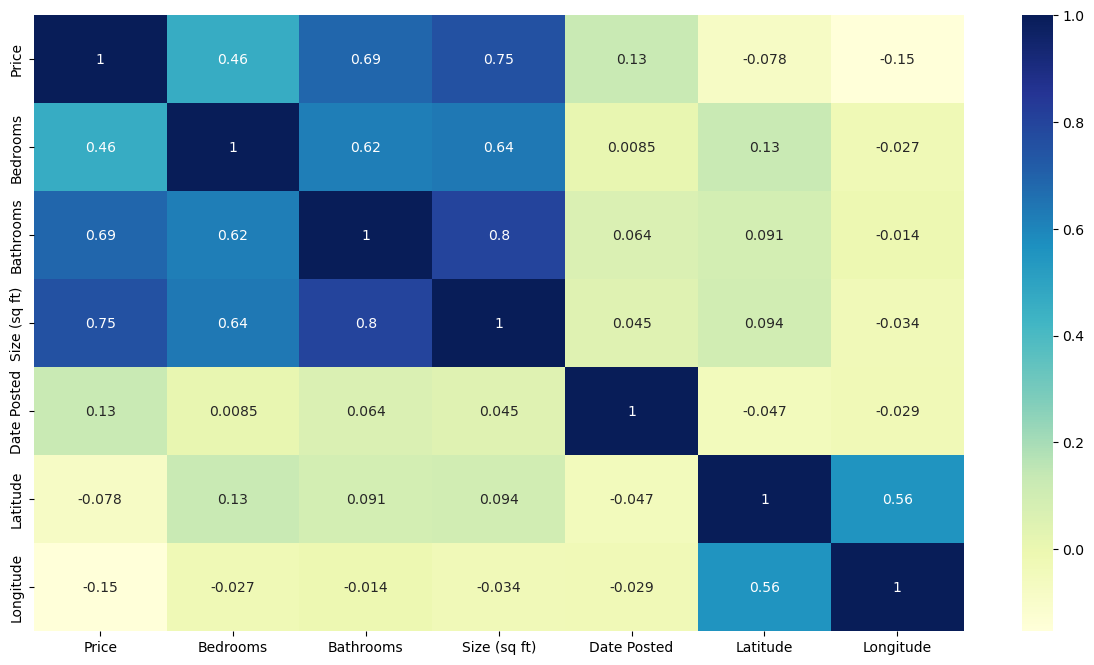

In [11]:
# Plot a heatmap of correlations between columns 
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>],
       [<Axes: title={'center': 'Size (sq ft)'}>,
        <Axes: title={'center': 'Date Posted'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >]],
      dtype=object)

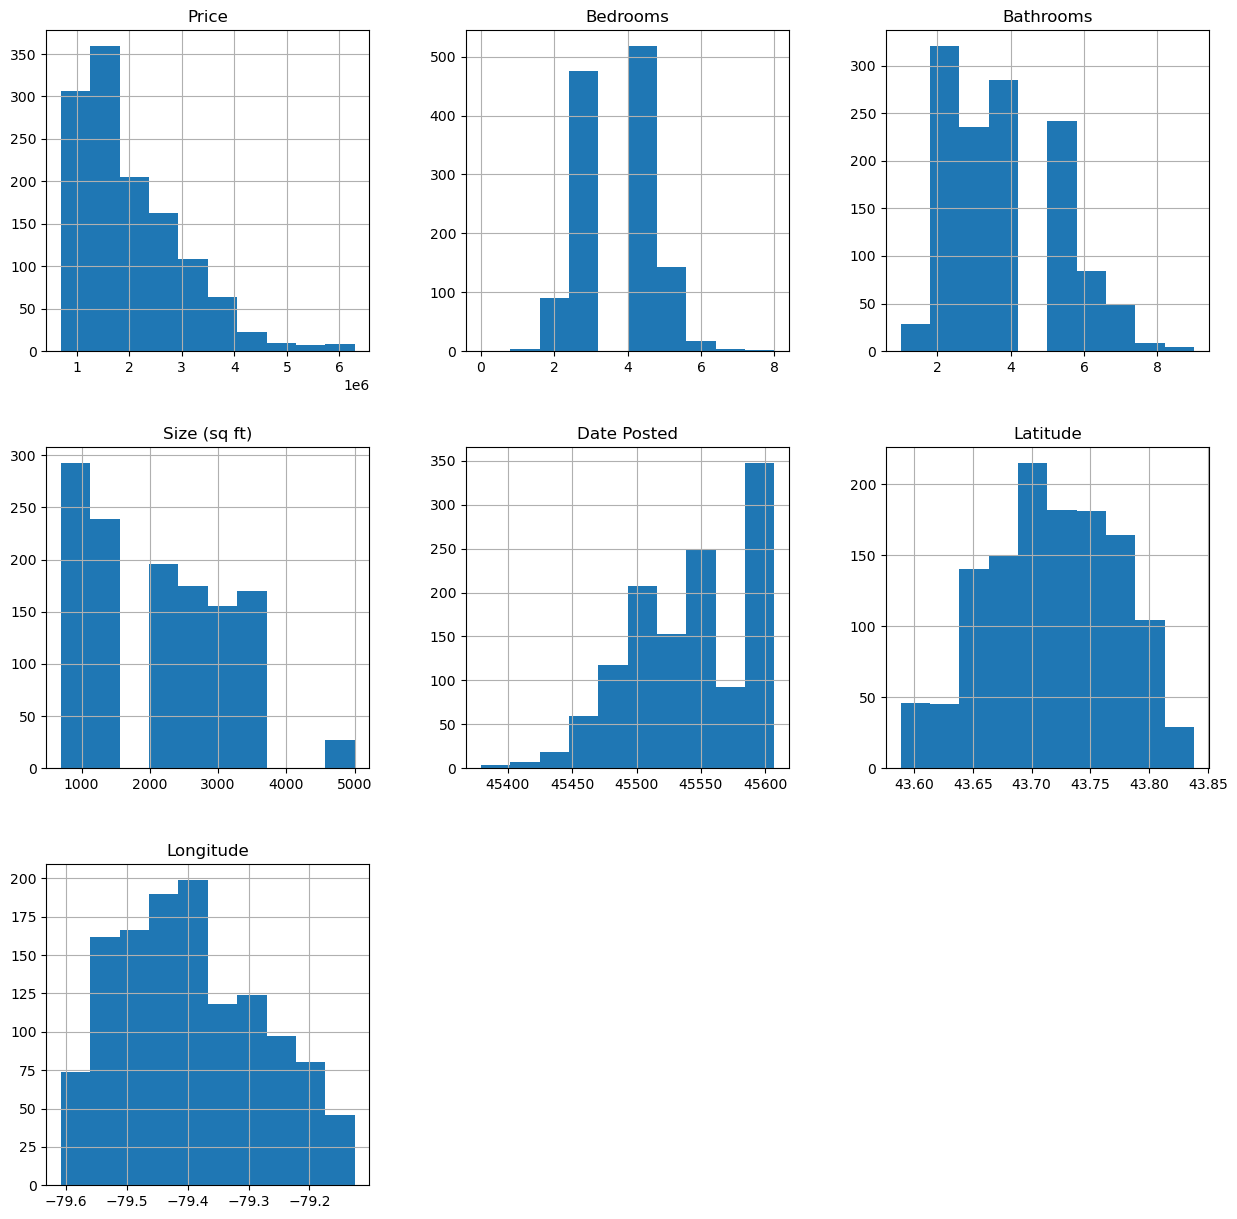

In [12]:
data.hist(figsize=(15,15))

<Axes: xlabel='Latitude', ylabel='Longitude'>

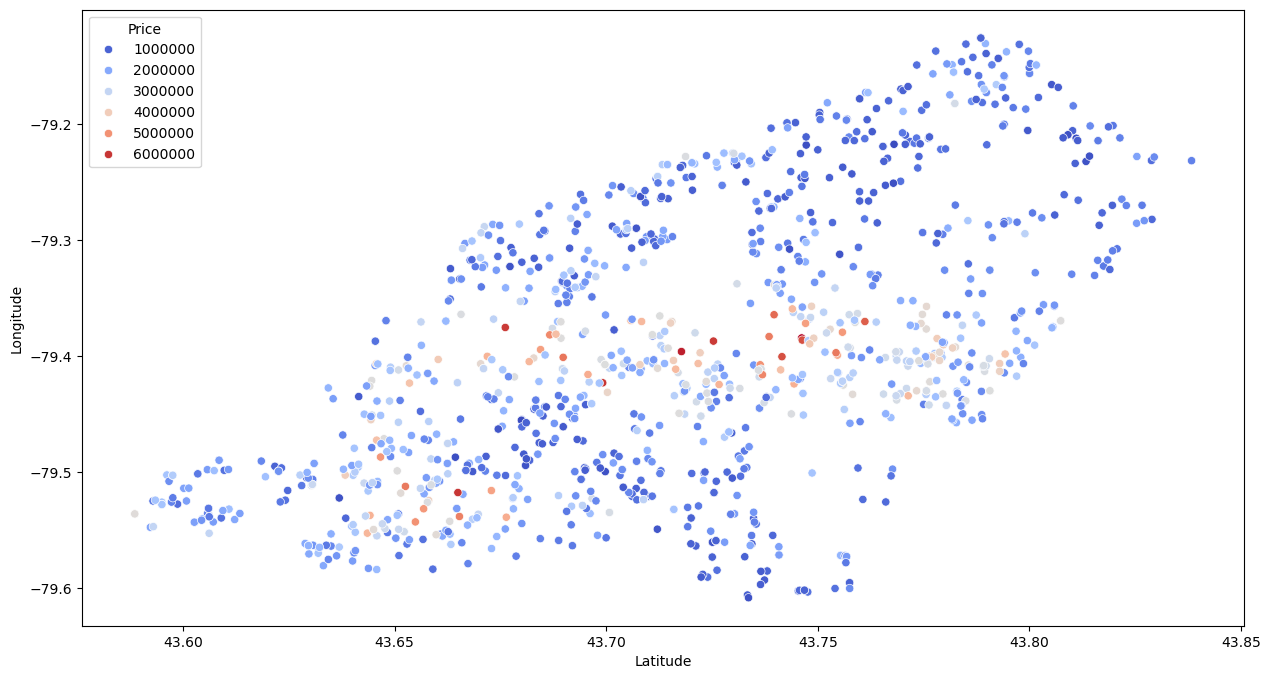

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Latitude", y = "Longitude", data=data, hue="Price", palette="coolwarm")

In [14]:
# Converting municipality category into separate binary value columns
data.MUNICIPLAITY.value_counts()

MUNICIPLAITY
North York        369
Scarborough       307
Etobicoke         246
former Toronto    202
York               76
East York          56
Name: count, dtype: int64

In [15]:
data = data.join(pd.get_dummies(data.MUNICIPLAITY, dtype=int)).drop(['MUNICIPLAITY'], axis=1)
data

,WARD,NEIGHBORHOOD_FORMAL,Price,Bedrooms,Bathrooms,Size (sq ft),Building_Style,Date Posted,Latitude,Longitude,East York,Etobicoke,North York,Scarborough,York,former Toronto
1,Humber River-Black Creek,Black Creek,1129000,3,2,1100.0,Bungalow-Raised,45457,43.760643,-79.523830,0,0,1,0,0,0
2,Humber River-Black Creek,Black Creek,1099000,3,2,1500.0,Sidesplit 3,45588,43.766058,-79.526011,0,0,1,0,0,0
5,Etobicoke North,Mount Olive-Silverstone-Jamestown,1049000,3,2,1100.0,2-Storey,45553,43.757508,-79.595617,0,1,0,0,0,0
6,Etobicoke North,Mount Olive-Silverstone-Jamestown,999000,3,2,1100.0,2-Storey,45581,43.757508,-79.595617,0,1,0,0,0,0
9,Humber River-Black Creek,Humber Summit,2275000,5,4,3500.0,Backsplit 5,45516,43.755395,-79.572076,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,York South-Weston,Rockcliffe-Smythe,1299000,3,1,1100.0,2-Storey,45511,43.666812,-79.498784,0,0,0,0,1,0
3822,York South-Weston,Rockcliffe-Smythe,1199000,3,1,1100.0,2-Storey,45602,43.666812,-79.498784,0,0,0,0,1,0
3824,Davenport,Weston-Pelham Park,849000,2,1,700.0,2-Storey,45508,43.674470,-79.463114,0,0,0,0,0,1
3825,Davenport,Weston-Pelham Park,849000,2,1,700.0,2-Storey,45575,43.674470,-79.463114,0,0,0,0,0,1


In [16]:
data.Building_Style.value_counts()

Building_Style
2-Storey           718
Bungalow           211
3-Storey            89
1 1/2 Storey        48
Bungalow-Raised     41
2 1/2 Storey        38
Sidesplit 4         31
Backsplit 4         30
Backsplit 3         18
Sidesplit 3         12
Backsplit 5         11
Bungaloft            6
Sidesplit 5          3
Name: count, dtype: int64

In [17]:
data = data.join(pd.get_dummies(data.Building_Style, dtype=int)).drop(['Building_Style'], axis=1)
data

,WARD,NEIGHBORHOOD_FORMAL,Price,Bedrooms,Bathrooms,Size (sq ft),Date Posted,Latitude,Longitude,East York,...,3-Storey,Backsplit 3,Backsplit 4,Backsplit 5,Bungaloft,Bungalow,Bungalow-Raised,Sidesplit 3,Sidesplit 4,Sidesplit 5
1,Humber River-Black Creek,Black Creek,1129000,3,2,1100.0,45457,43.760643,-79.523830,0,...,0,0,0,0,0,0,1,0,0,0
2,Humber River-Black Creek,Black Creek,1099000,3,2,1500.0,45588,43.766058,-79.526011,0,...,0,0,0,0,0,0,0,1,0,0
5,Etobicoke North,Mount Olive-Silverstone-Jamestown,1049000,3,2,1100.0,45553,43.757508,-79.595617,0,...,0,0,0,0,0,0,0,0,0,0
6,Etobicoke North,Mount Olive-Silverstone-Jamestown,999000,3,2,1100.0,45581,43.757508,-79.595617,0,...,0,0,0,0,0,0,0,0,0,0
9,Humber River-Black Creek,Humber Summit,2275000,5,4,3500.0,45516,43.755395,-79.572076,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,York South-Weston,Rockcliffe-Smythe,1299000,3,1,1100.0,45511,43.666812,-79.498784,0,...,0,0,0,0,0,0,0,0,0,0
3822,York South-Weston,Rockcliffe-Smythe,1199000,3,1,1100.0,45602,43.666812,-79.498784,0,...,0,0,0,0,0,0,0,0,0,0
3824,Davenport,Weston-Pelham Park,849000,2,1,700.0,45508,43.674470,-79.463114,0,...,0,0,0,0,0,0,0,0,0,0
3825,Davenport,Weston-Pelham Park,849000,2,1,700.0,45575,43.674470,-79.463114,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data.WARD.value_counts()

WARD
Willowdale                  99
Etobicoke Centre            98
Etobicoke-Lakeshore         98
Scarborough-Rouge Park      79
Scarborough Southwest       76
York South-Weston           74
Eglinton-Lawrence           67
Scarborough-Guildwood       56
Don Valley West             55
York Centre                 51
Etobicoke North             50
Beaches-East York           50
Scarborough Centre          46
Toronto-Danforth            45
Don Valley North            40
Davenport                   40
Parkdale-High Park          40
Toronto-St. Paul's          36
Don Valley East             33
Humber River-Black Creek    31
Scarborough-Agincourt       27
University-Rosedale         27
Scarborough North           23
Spadina-Fort York           11
Toronto Centre               4
Name: count, dtype: int64

In [19]:
data = data.join(pd.get_dummies(data.WARD, dtype=int)).drop(['WARD'], axis=1)
data

,NEIGHBORHOOD_FORMAL,Price,Bedrooms,Bathrooms,Size (sq ft),Date Posted,Latitude,Longitude,East York,Etobicoke,...,Scarborough-Guildwood,Scarborough-Rouge Park,Spadina-Fort York,Toronto Centre,Toronto-Danforth,Toronto-St. Paul's,University-Rosedale,Willowdale,York Centre,York South-Weston
1,Black Creek,1129000,3,2,1100.0,45457,43.760643,-79.523830,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Black Creek,1099000,3,2,1500.0,45588,43.766058,-79.526011,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Mount Olive-Silverstone-Jamestown,1049000,3,2,1100.0,45553,43.757508,-79.595617,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Mount Olive-Silverstone-Jamestown,999000,3,2,1100.0,45581,43.757508,-79.595617,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Humber Summit,2275000,5,4,3500.0,45516,43.755395,-79.572076,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,Rockcliffe-Smythe,1299000,3,1,1100.0,45511,43.666812,-79.498784,0,0,...,0,0,0,0,0,0,0,0,0,1
3822,Rockcliffe-Smythe,1199000,3,1,1100.0,45602,43.666812,-79.498784,0,0,...,0,0,0,0,0,0,0,0,0,1
3824,Weston-Pelham Park,849000,2,1,700.0,45508,43.674470,-79.463114,0,0,...,0,0,0,0,0,0,0,0,0,0
3825,Weston-Pelham Park,849000,2,1,700.0,45575,43.674470,-79.463114,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data.NEIGHBORHOOD_FORMAL.value_counts()

NEIGHBORHOOD_FORMAL
Cliffcrest                         30
East Willowdale                    30
Islington                          26
Stonegate-Queensway                25
Banbury-Don Mills                  23
                                   ..
Cabbagetown-South St.James Town     2
University                          1
South Eglinton-Davisville           1
Taylor-Massey                       1
East L'Amoreaux                     1
Name: count, Length: 142, dtype: int64

In [21]:
data = data.join(pd.get_dummies(data.NEIGHBORHOOD_FORMAL, dtype=int)).drop(['NEIGHBORHOOD_FORMAL'], axis=1)
data

,Price,Bedrooms,Bathrooms,Size (sq ft),Date Posted,Latitude,Longitude,East York,Etobicoke,North York,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn North,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
1,1129000,3,2,1100.0,45457,43.760643,-79.523830,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1099000,3,2,1500.0,45588,43.766058,-79.526011,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1049000,3,2,1100.0,45553,43.757508,-79.595617,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,999000,3,2,1100.0,45581,43.757508,-79.595617,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,2275000,5,4,3500.0,45516,43.755395,-79.572076,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,1299000,3,1,1100.0,45511,43.666812,-79.498784,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3822,1199000,3,1,1100.0,45602,43.666812,-79.498784,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3824,849000,2,1,700.0,45508,43.674470,-79.463114,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3825,849000,2,1,700.0,45575,43.674470,-79.463114,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

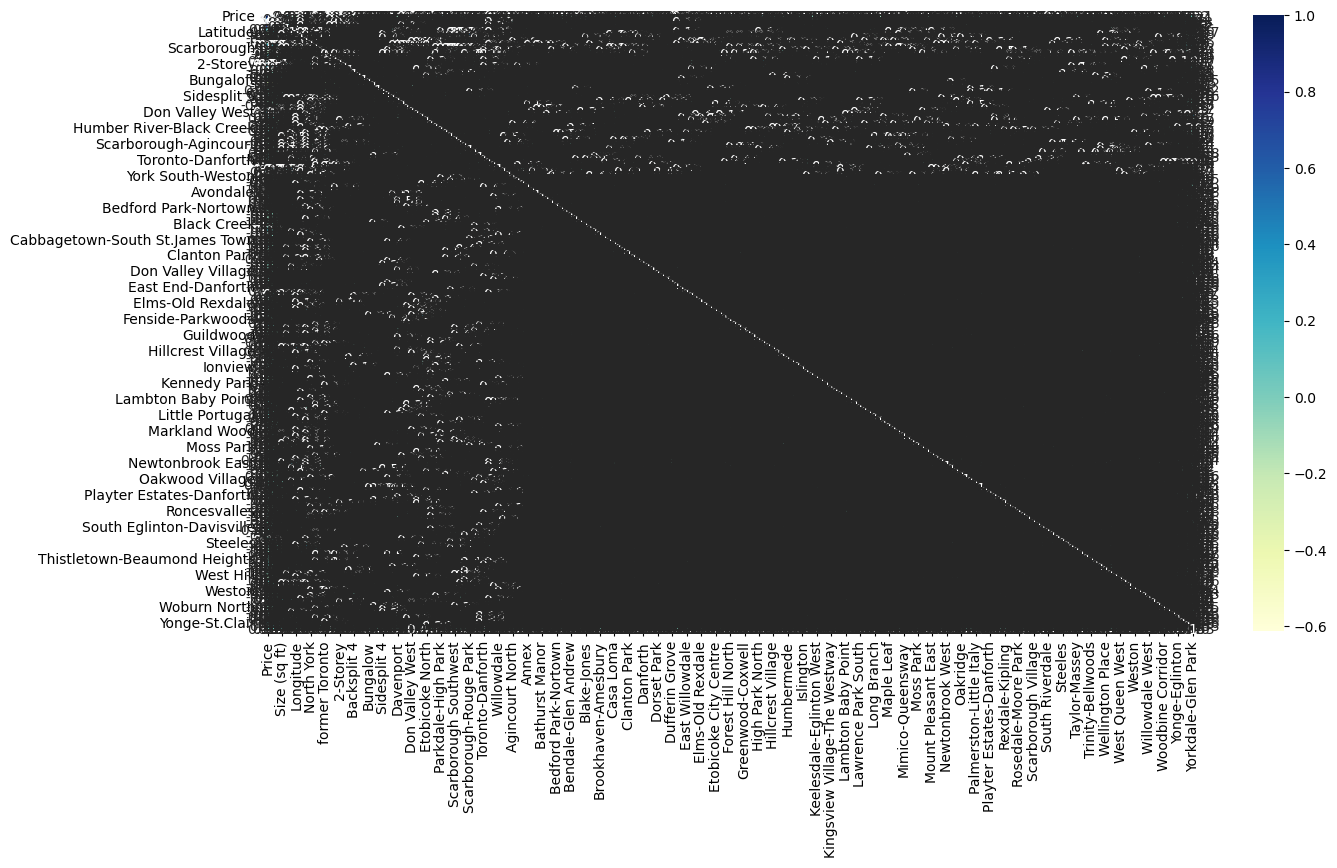

In [22]:
# Plot updated heatmap with new categories for municipalities 
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [23]:
# Create x and y variables to train and test data 
X = data.drop('Price', axis=1)
y = data['Price']

In [24]:
# Create train, test data variables, and split data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [25]:
# Implement linear regression model using training data 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
# Determine model score using test data
score = model.score(x_test, y_test)
print(score)

0.7449539032488381


In [27]:
# Use model to predict prices and test x values 
y_pred = model.predict(x_test)
pred_data = pd.DataFrame({'Test': y_test, 'Pred': y_pred})
pred_data


,Test,Pred
3132,1999900,2.220782e+06
3205,899000,6.777675e+05
564,2298000,2.037267e+06
3023,2398000,2.044168e+06
1,1129000,4.456313e+05
...,...,...
350,5199000,2.614196e+06
2418,749000,9.245206e+05
3338,999999,1.129967e+06
1759,2950000,3.499344e+06


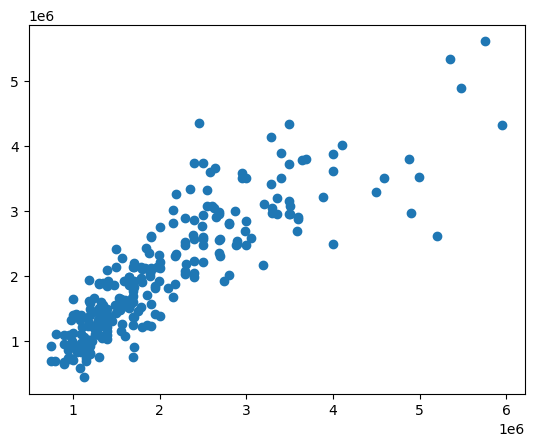

In [28]:
plt.scatter(x = pred_data['Test'], y = pred_data['Pred'])
plt.show()

In [29]:
from sklearn.metrics import r2_score
score = r2_score(pred_data['Test'], pred_data['Pred'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 74.0%


In [30]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(pred_data['Test'], pred_data['Pred'])
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 368790.73


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np
score = np.sqrt(mean_absolute_error(pred_data['Test'], pred_data['Pred']))
# score = (mean_squared_error(pred_data['Test'], pred_data['Pred']))

print("The Root Mean Squared Error of our Model is {}".format(round(score, 2)))

The Root Mean Squared Error of our Model is 607.28


In [32]:
fig = px.density_mapbox(data, lat=x_test['Latitude'], lon=x_test['Longitude'], z = pred_data['Pred'], radius=25, center=dict(lat=data.Latitude.mean(), lon=data.Longitude.mean()), zoom=10,mapbox_style="open-street-map", height=900)
fig.show()